In [1]:
# Train a neural network to classify linearly seperable dataset (without any hidden layer)
    # Observe its failure to classify non linear dataset
    # Add hidden layer and observe the difference (use activation "relu" or "sigmoid")
    # dataset : explore sklearn moon ,circle etc.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification,make_moons,make_circles
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [160]:
# Generating a linearly seperable dataset
X_linear,y_linear=make_classification(n_samples=400, n_features=2, n_informative=2,n_redundant=0, n_clusters_per_class=1, class_sep=2.0, random_state=42)

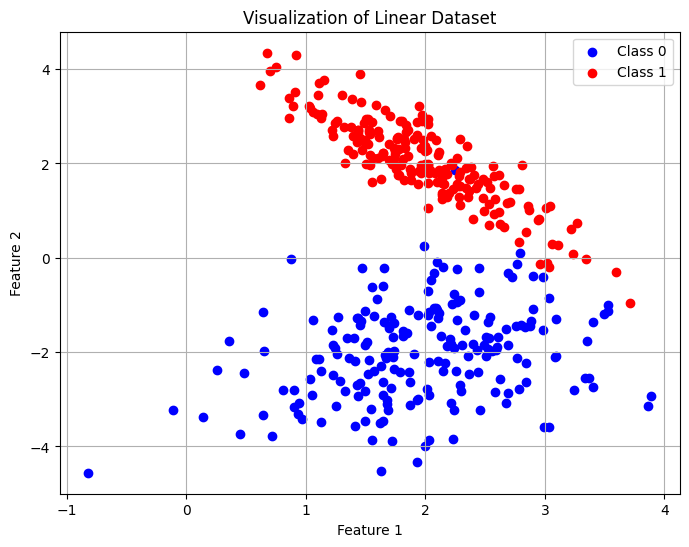

In [161]:
# Visualisation
plt.figure(figsize=(8, 6))
plt.scatter(X_linear[y_linear == 0][:, 0], X_linear[y_linear == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X_linear[y_linear == 1][:, 0], X_linear[y_linear == 1][:, 1], color='red', label='Class 1')
plt.title('Visualization of Linear Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [184]:
# Creating a neural network

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_linear, y_linear, test_size=0.3, random_state=42)


# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Define a neural network without hidden layers
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        # There is no hidden layer, only 1 output layer
        self.fc = nn.Linear(input_dim, 1)  

    def forward(self, x):
        # Using sigmoid activation for binary classification (linear classification)
        return torch.sigmoid(self.fc(x))  

# Initialize the model, loss function, and optimizer
model = SimpleNN(input_dim=2)
criterion = nn.BCELoss()
# Binary cross entropy loss
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [185]:
# Training loop
epochs = 50
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred_labels = (y_pred > 0.5).float()
        train_accuracy = (y_pred_labels.view(-1) == y_train_tensor.view(-1)).float().mean()


    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Training Accuracy: {train_accuracy.item() * 100:.2f}%")


# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_tensor)
    y_pred_labels = (y_pred_test > 0.5).float()

    accuracy = (y_pred_labels.view(-1) == y_test_tensor.view(-1)).float().mean()
    print(f"Test Accuracy: {accuracy.item() * 100:.2f}%")

Epoch 10/50, Loss: 0.5099, Training Accuracy: 89.64%
Epoch 20/50, Loss: 0.4982, Training Accuracy: 90.36%
Epoch 30/50, Loss: 0.4871, Training Accuracy: 91.07%
Epoch 40/50, Loss: 0.4764, Training Accuracy: 91.79%
Epoch 50/50, Loss: 0.4662, Training Accuracy: 92.14%
Test Accuracy: 94.17%


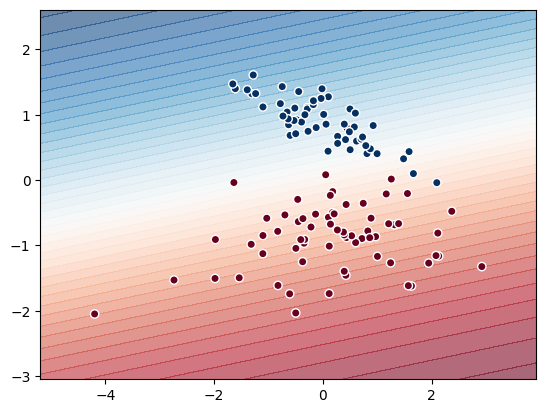

In [186]:
# Visualize decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, 100), torch.linspace(y_min, y_max, 100))
    grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1).float()
    with torch.no_grad():
        pred = model(grid)
    pred = pred.reshape(xx.shape)
    plt.contourf(xx, yy, pred, levels=50, cmap="RdBu", alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="RdBu", edgecolors="white")
    plt.show()

plot_decision_boundary(model, X_test, y_test)

In [246]:
# Generating the moon dataset
X_moon,y_moon = make_moons(n_samples=500,noise=0.25,random_state=42)

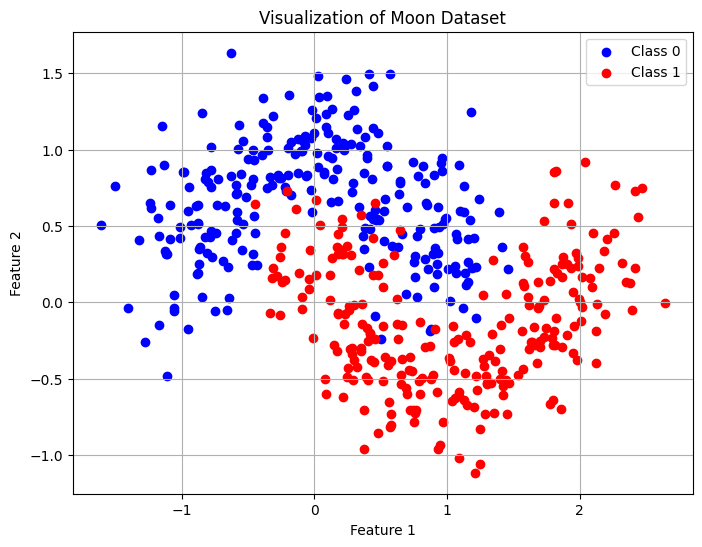

In [247]:
# Visualisation
plt.figure(figsize=(8, 6))
plt.scatter(X_moon[y_moon == 0][:, 0], X_moon[y_moon == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X_moon[y_moon == 1][:, 0], X_moon[y_moon == 1][:, 1], color='red', label='Class 1')
plt.title('Visualization of Moon Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [248]:
# Creating a model for Moon dataset and checking its feasibility

# Splitting the dataset
X_train_moon, X_test_moon, y_train_moon, y_test_moon = train_test_split(X_moon, y_moon, test_size=0.3, random_state=42)


# Standardize the data
X_train_moon = scaler.fit_transform(X_train_moon)
X_test_moon = scaler.transform(X_test_moon)


# Convert to PyTorch tensors
X_train_tensor_moon = torch.tensor(X_train_moon, dtype=torch.float32)
y_train_tensor_moon = torch.tensor(y_train_moon, dtype=torch.float32).view(-1, 1)
X_test_tensor_moon = torch.tensor(X_test_moon, dtype=torch.float32)
y_test_tensor_moon = torch.tensor(y_test_moon, dtype=torch.float32).view(-1, 1)

# Initialize the model, loss function, and optimizer
model_moon = SimpleNN(input_dim=2)
criterion_moon = nn.BCELoss() 
# Binary cross entropy loss
optimizer_moon = optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 50
for epoch in range(epochs):
    model_moon.train()
    optimizer_moon.zero_grad()
    y_pred_moon = model_moon(X_train_tensor_moon)
    loss_moon = criterion_moon(y_pred_moon, y_train_tensor_moon)
    loss_moon.backward()
    optimizer_moon.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss_moon.item()}")

# Evaluate the model
model_moon.eval()
with torch.no_grad():
    y_pred_test_moon = model_moon(X_test_tensor_moon)
    y_pred_labels_moon = (y_pred_test_moon > 0.5).float()

    accuracy_moon = (y_pred_labels_moon.view(-1) == y_test_tensor_moon.view(-1)).float().mean()
    print(f"Test Accuracy: {accuracy_moon.item() * 100:.2f}%")

Epoch 10/50, Loss: 0.5697411894798279
Epoch 20/50, Loss: 0.5697411894798279
Epoch 30/50, Loss: 0.5697411894798279
Epoch 40/50, Loss: 0.5697411894798279
Epoch 50/50, Loss: 0.5697411894798279
Test Accuracy: 64.67%


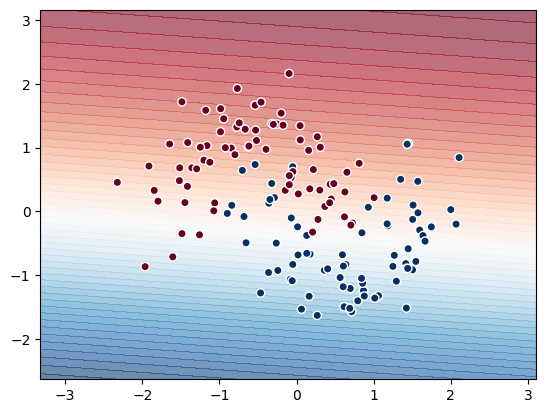

In [249]:
# Visualising the decision boundary
plot_decision_boundary(model_moon, X_test_moon, y_test_moon)

In [250]:
# Generating the circle dataset
X_circle,y_circle=make_circles(n_samples=600,noise=0.3,factor=0.5,random_state=42)

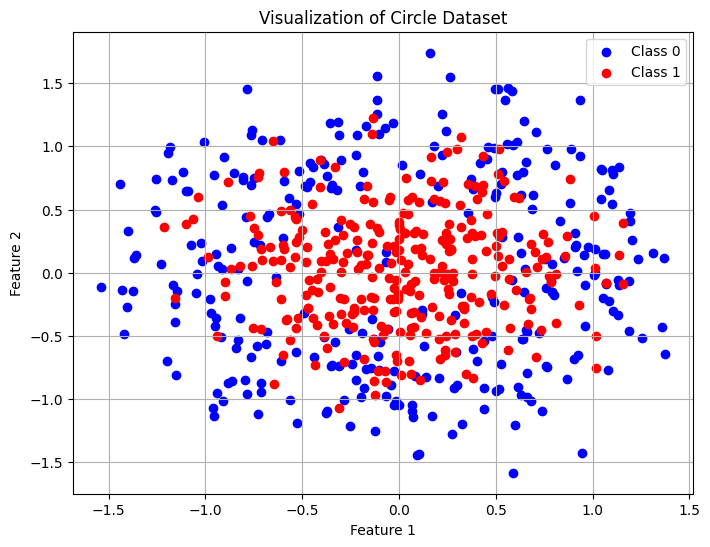

In [251]:
# Visualisation
plt.figure(figsize=(8, 6))
plt.scatter(X_circle[y_circle == 0][:, 0], X_circle[y_circle == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X_circle[y_circle == 1][:, 0], X_circle[y_circle == 1][:, 1], color='red', label='Class 1')
plt.title('Visualization of Circle Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [252]:
# Creating a model for circle dataset and checking its feasibility

# Splitting the dataset
X_train_circle, X_test_circle, y_train_circle, y_test_circle = train_test_split(X_circle, y_circle, test_size=0.3, random_state=42)


# Standardize the data
X_train_circle = scaler.fit_transform(X_train_circle)
X_test_circle = scaler.transform(X_test_circle)


# Convert to PyTorch tensors
X_train_tensor_circle = torch.tensor(X_train_circle, dtype=torch.float32)
y_train_tensor_circle = torch.tensor(y_train_circle, dtype=torch.float32).view(-1, 1)
X_test_tensor_circle = torch.tensor(X_test_circle, dtype=torch.float32)
y_test_tensor_circle = torch.tensor(y_test_circle, dtype=torch.float32).view(-1, 1)

# Initialize the model, loss function, and optimizer
model_circle = SimpleNN(input_dim=2)
criterion_circle = nn.BCELoss() 
# Binary cross entropy loss
optimizer_circle = optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 50
for epoch in range(epochs):
    model_circle.train()
    optimizer_circle.zero_grad()
    y_pred_circle = model_circle(X_train_tensor_circle)
    loss_circle = criterion_circle(y_pred_circle, y_train_tensor_circle)
    loss_circle.backward()
    optimizer_circle.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss_circle.item()}")

# Evaluate the model
model_circle.eval()
with torch.no_grad():
    y_pred_test_circle = model_circle(X_test_tensor_circle)
    y_pred_labels_circle = (y_pred_test_circle > 0.5).float()

    accuracy_circle = (y_pred_labels_circle.view(-1) == y_test_tensor_circle.view(-1)).float().mean()
    print(f"Test Accuracy: {accuracy_circle.item() * 100:.2f}%")

Epoch 10/50, Loss: 0.7611390352249146
Epoch 20/50, Loss: 0.7611390352249146
Epoch 30/50, Loss: 0.7611390352249146
Epoch 40/50, Loss: 0.7611390352249146
Epoch 50/50, Loss: 0.7611390352249146
Test Accuracy: 40.56%


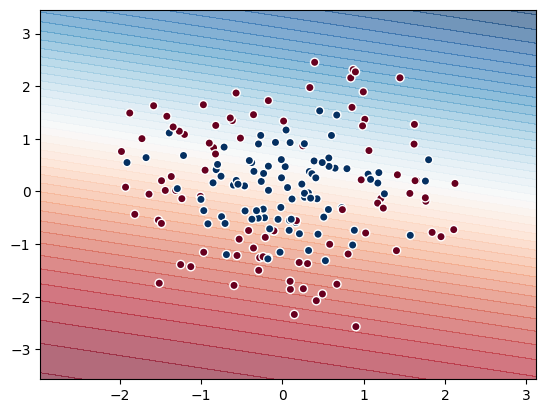

In [253]:
# Visualising the decision boundary
plot_decision_boundary(model_circle, X_test_circle, y_test_circle)

In [254]:
# Now adding a hidden layer to the neural network as it is inefficient for moon and circle datasets (linearly inseperable)
# Define a neural network with one hidden layer
class ComplexNN(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(ComplexNN, self).__init__()
        # Define the hidden layer
        self.hidden = nn.Linear(input_dim, hidden_dim)
        # Define the output layer
        self.output = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        # Pass input through the hidden layer and apply ReLU activation
        x = torch.relu(self.hidden(x))
        # Pass through the output layer and apply sigmoid for binary classification
        return torch.sigmoid(self.output(x))


In [266]:
# For Moon dataset


# Initializing the model
model_moon_complex = ComplexNN(input_dim=2, hidden_dim=128)

# criterion_moon = nn.BCELoss()
# optimizer_moon = optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 50

for epoch in range(epochs):
    model_moon_complex.train()
    optimizer_moon.zero_grad()
    y_pred_moon_complex = model_moon_complex(X_train_tensor_moon)
    loss_moon_complex = criterion_moon(y_pred_moon_complex, y_train_tensor_moon)
    loss_moon_complex.backward()
    optimizer_moon.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss_moon_complex.item()}")

# Evaluate the model
model_moon.eval()
with torch.no_grad():
    y_pred_test_moon_complex = model_moon_complex(X_test_tensor_moon)
    y_pred_labels_moon_complex = (y_pred_test_moon_complex > 0.5).float()

    accuracy_moon_complex = (y_pred_labels_moon_complex.view(-1) == y_test_tensor_moon.view(-1)).float().mean()
    print(f"Test Accuracy: {accuracy_moon_complex.item() * 100:.2f}%")


Epoch 10/50, Loss: 0.6265069842338562
Epoch 20/50, Loss: 0.6265069842338562
Epoch 30/50, Loss: 0.6265069842338562
Epoch 40/50, Loss: 0.6265069842338562
Epoch 50/50, Loss: 0.6265069842338562
Test Accuracy: 80.00%


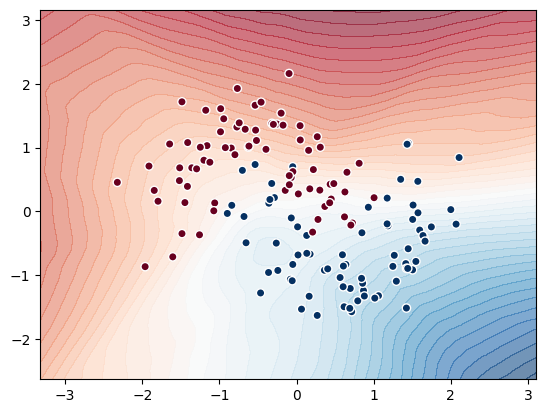

In [267]:
# Visualising the decision boundary
plot_decision_boundary(model_moon_complex, X_test_moon, y_test_moon)